In [1]:
import torch
from torch import nn

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("F:/python/机器学习")
image_path = data_path / "SData"

In [3]:
image_path

WindowsPath('F:/python/机器学习/SData')

In [4]:
import os
def walk_through_dir(dir_path):
# 这里可以可视化一下
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 4 images in 'F:\python\机器学习\SData'.
There are 10 directories and 0 images in 'F:\python\机器学习\SData\test'.
There are 0 directories and 980 images in 'F:\python\机器学习\SData\test\0'.
There are 0 directories and 1135 images in 'F:\python\机器学习\SData\test\1'.
There are 0 directories and 1032 images in 'F:\python\机器学习\SData\test\2'.
There are 0 directories and 1010 images in 'F:\python\机器学习\SData\test\3'.
There are 0 directories and 982 images in 'F:\python\机器学习\SData\test\4'.
There are 0 directories and 892 images in 'F:\python\机器学习\SData\test\5'.
There are 0 directories and 958 images in 'F:\python\机器学习\SData\test\6'.
There are 0 directories and 1028 images in 'F:\python\机器学习\SData\test\7'.
There are 0 directories and 974 images in 'F:\python\机器学习\SData\test\8'.
There are 0 directories and 1009 images in 'F:\python\机器学习\SData\test\9'.
There are 10 directories and 0 images in 'F:\python\机器学习\SData\train'.
There are 0 directories and 5923 images in 'F:\python\机器学习\S

In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [7]:
import random
from PIL import Image
random.seed(42) 

image_path_list = list(image_path.glob("*/*/*.png"))


random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

Random image path: F:\python\机器学习\SData\train\0\mnist_train_52064.png
Image class: 0
Image height: 28
Image width: 28


In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(28, 28)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 60000
    Root location: F:\python\机器学习\SData\train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 10000
    Root location: F:\python\机器学习\SData\test
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [9]:
img, label = train_data[0][0], train_data[0][1]

In [11]:
img.shape

torch.Size([3, 28, 28])

In [1]:
import torch
import torch.nn as nn
from Config import *
import numpy as np
from creat_dataset import *
from engine import *
import models
import matplotlib.pyplot as plt

In [55]:
source_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.Grayscale(num_output_channels = 1),
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomInvert(p=0.5), # 数据增强随机翻转
    transforms.ToTensor() 
])

"""目标数据集的创建"""

traget_train_dataset = mydataset(Config.train_x,Config.train_y,source_transform)
traget_test_dataset = mydataset(Config.test_x,Config.test_y,source_transform)
traget_train_dataloader = DataLoader(traget_train_dataset,Config.batch_size,shuffle=True)
traget_test_dataloader = DataLoader(traget_test_dataset,Config.batch_size,shuffle=True)



"""源数据的创建"""

source_train_data = datasets.ImageFolder(root=Config.train_dir, 
                                  transform=source_transform, 
                                  target_transform=None) 
source_test_data = datasets.ImageFolder(root=Config.test_dir, 
                                 transform=source_transform)
source_train_dataloader = DataLoader(source_train_data,Config.batch_size,shuffle=True)
source_test_dataloader = DataLoader(source_test_data,Config.batch_size,shuffle=True)

59001
9001


In [16]:
layer = nn.Sequential(nn.Conv2d(3,96,11,4,0),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=3,stride=2),
                                   nn.Conv2d(96,256,5,1,2),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=3,stride=2),
                                   nn.Conv2d(256,384,3,1,1),
                                   nn.ReLU(),
                                   nn.Conv2d(384,384,3,1,1),
                                   nn.ReLU(),
                                   nn.Conv2d(384,256,3,1,1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=3,stride=2))

In [26]:
x,y = next(iter(source_train_dataloader))

In [27]:
x.shape

torch.Size([32, 3, 227, 227])

In [28]:
x = layer(x)

In [29]:
x = x.view(x.size(0), 256 * 6 * 6)
x

tensor([[0.0100, 0.0100, 0.0069,  ..., 0.0105, 0.0086, 0.0063],
        [0.0146, 0.0117, 0.0088,  ..., 0.0084, 0.0059, 0.0052],
        [0.0145, 0.0085, 0.0085,  ..., 0.0044, 0.0052, 0.0055],
        ...,
        [0.0138, 0.0121, 0.0129,  ..., 0.0059, 0.0043, 0.0050],
        [0.0159, 0.0093, 0.0093,  ..., 0.0073, 0.0073, 0.0046],
        [0.0106, 0.0106, 0.0101,  ..., 0.0107, 0.0054, 0.0041]],
       grad_fn=<ViewBackward0>)

In [72]:
source_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomInvert(p=0.5), # 数据增强随机翻转
    transforms.ToTensor() 
])

"""目标数据集的创建"""

traget_train_dataset = mydataset(Config.train_x,Config.train_y,source_transform)
traget_test_dataset = mydataset(Config.test_x,Config.test_y,source_transform)
traget_train_dataloader = DataLoader(traget_train_dataset,Config.batch_size,shuffle=True)
traget_test_dataloader = DataLoader(traget_test_dataset,Config.batch_size,shuffle=True)



"""源数据的创建"""

source_train_data = datasets.ImageFolder(root=Config.train_dir, 
                                  transform=source_transform, 
                                  target_transform=None) 
source_test_data = datasets.ImageFolder(root=Config.test_dir, 
                                 transform=source_transform)
source_train_dataloader = DataLoader(source_train_data,Config.batch_size,shuffle=False)
source_test_dataloader = DataLoader(source_test_data,Config.batch_size,shuffle=False)

59001
9001


59001
9001


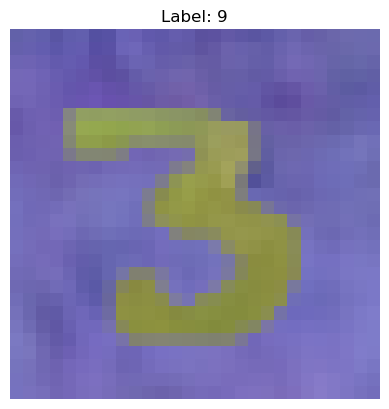

In [78]:
from PIL import Image
import matplotlib.pyplot as plt
traget_train_dataset = mydataset(Config.train_x,Config.train_y,source_transform)
traget_test_dataset = mydataset(Config.test_x,Config.test_y,source_transform)
# 加载图像和标签
x,y = traget_train_dataset[12][0],traget_test_dataset [12][1]

# # 如果图像是张量，需要将其转换为 PIL 图像
# if isinstance(x, torch.Tensor):
#     x = x.squeeze()  # 移除单维度
#     # 将通道维度放到最后
#     x = x.to('cpu').numpy()  # 转换到 CPU 并转换为 numpy 数组

# # 确保它是 PIL 图像
# x = Image.fromarray(x)
x = x.permute(1, 2, 0)
# 使用 matplotlib 显示图像
plt.imshow(x)
plt.title(f'Label: {y}')
plt.axis('off')  # 不显示坐标轴
plt.show()

In [79]:

class mydataset(Dataset):
    def __init__(self,data_dir,target_dir,transform=None):
        self.paths= list(Path(data_dir).glob("*.png"))
        labels = []
        with open(target_dir, 'r') as file:
            for line in file:
                line = line.strip()
                line_parts = int(line.split()[1])
                labels.append(line_parts)
        print(len(labels))
        self.y = torch.tensor(labels)
        self.transforms = transform

    def load_image(self, index):
        image_path = self.paths[index]
        return Image.open(image_path)     

    def __getitem__(self, index):
        img = self.load_image(index)
        label = self.y[index]
        if self.transfroms:
            return self.transfroms(img),label
        else:
            return img, label
    def __getitem__(self, index):
        img = self.load_image(index)
        label = self.y[index]
        if self.transforms is not None:  
            return self.transforms(img), label
        else:
            return img, label
    def __len__(self):
        return len(self.paths)

In [1]:
target_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.Grayscale(num_output_channels = 1), #如果使用这个，记得改输入层
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.ToTensor() 
])
AAA = mydataset(Config.train_x,Config.train_y,source_transform)

NameError: name 'transforms' is not defined

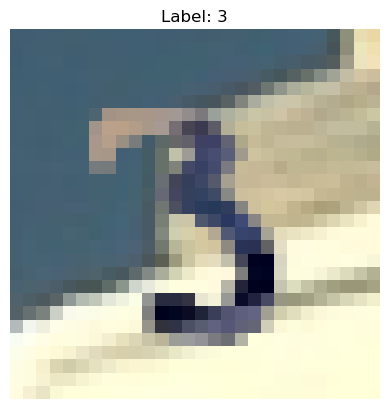

In [91]:
x,y = AAA[8888][0],AAA [8888][1]

# # 如果图像是张量，需要将其转换为 PIL 图像
# if isinstance(x, torch.Tensor):
#     x = x.squeeze()  # 移除单维度
#     # 将通道维度放到最后
#     x = x.to('cpu').numpy()  # 转换到 CPU 并转换为 numpy 数组

# # 确保它是 PIL 图像
# x = Image.fromarray(x)
x = x.permute(1, 2, 0)
# 使用 matplotlib 显示图像
plt.imshow(x)
plt.title(f'Label: {y}')
plt.axis('off')  # 不显示坐标轴
plt.show()